<a href="https://colab.research.google.com/github/martinsphl/MAI5035/blob/main/TAREFA_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAI5035: Task 1.1 by Paulo Martins, Vitória Barbosa and Isaac Saito

## Importing Main Libraries

In [28]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

# Preprocess data: standardization and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Avoiding warning messages
import warnings
warnings.filterwarnings('ignore')

# Setting a global seed
np.random.seed(7)

## Data Gathering

We created a github public repository to upload the csv dataset and do software versioning. From github public url, we load the data into a pandas dataframe.

In [29]:
# Defining the url of each dataset
dataset_url = 'https://raw.githubusercontent.com/martinsphl/MAI5035/refs/heads/main/Steel_industry_data_task01.csv'

# Creating pandas dataframe from each dataset
df = pd.read_csv(dataset_url, names=['date', 'Usage_kWh',	'Lagging_Current_Reactive.Power_kVarh',	'Leading_Current_Reactive_Power_kVarh',	'CO2(tCO2)',	'Lagging_Current_Power_Factor',	'Leading_Current_Power_Factor',	'NSM',	'WeekStatus',	'Day_of_week',	'Load_Type',	'id'], skiprows=1, delimiter=',')


In [30]:
# Just checking that the dataframe was loaded correctly from the Github URL
print(df.head(5).to_markdown())

|    | date             |   Usage_kWh |   Lagging_Current_Reactive.Power_kVarh |   Leading_Current_Reactive_Power_kVarh |   CO2(tCO2) |   Lagging_Current_Power_Factor |   Leading_Current_Power_Factor |   NSM | WeekStatus   | Day_of_week   | Load_Type   |   id |
|---:|:-----------------|------------:|---------------------------------------:|---------------------------------------:|------------:|-------------------------------:|-------------------------------:|------:|:-------------|:--------------|:------------|-----:|
|  0 | 01/01/2018 00:15 |    -1571.8  |                                   2.95 |                                      0 |           0 |                          73.21 |                            100 |   nan | Weekday      | Monday        | Light_Load  | 6819 |
|  1 | 01/01/2018 00:30 |        4    |                                   4.46 |                                    nan |           0 |                          66.77 |                            100 |  1800 | Week

## Data Exploration

On this stage, we will get knowlodge on data. So, we'll check the type of columns and how many null values there are; since this point, all next exploratory analysis will be under numerics columns: check descriptive statistics, density distribution and outliers occurrences by IQR.

In [31]:
# Checking the data type of each column and if there are missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  31429 non-null  object 
 1   Usage_kWh                             31641 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  31514 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  31559 non-null  float64
 4   CO2(tCO2)                             31421 non-null  float64
 5   Lagging_Current_Power_Factor          31553 non-null  float64
 6   Leading_Current_Power_Factor          31488 non-null  float64
 7   NSM                                   31556 non-null  float64
 8   WeekStatus                            31586 non-null  object 
 9   Day_of_week                           31422 non-null  object 
 10  Load_Type                             31419 non-null  object 
 11  id             

First of all, we will visualize the cadence on date column in minutes by bar chart.

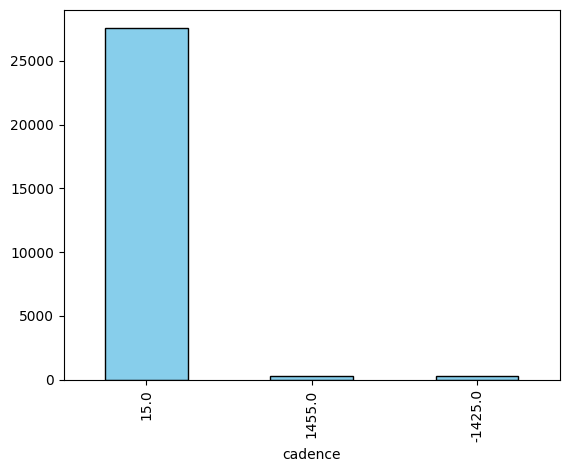

In [32]:
# Change the column type to be able to apply some arithmetic to this column
df['date_format'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M", errors='coerce')
df['cadence'] = df.date_format - df.date_format.shift() # on datetime format
# replace datetime format by int one to count how many minutes there are
df['cadence'] = df.cadence.dt.total_seconds() / 60
df['cadence'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
df.drop(columns=['cadence', 'date_format'], axis=1, inplace=True)

The remaining columns of the object type will be summarized and presented using a pier chart, these are: WeekStatus, Day_of_week and Load_Type (target-column)

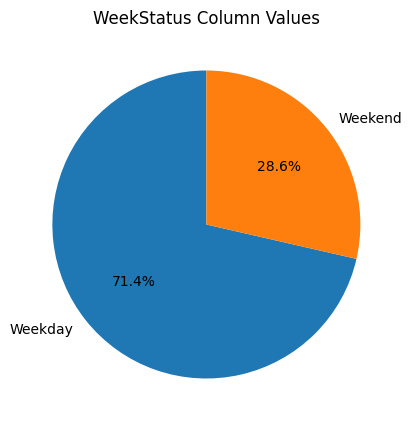

In [33]:
# Count distinct values
value_counts = df['WeekStatus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('WeekStatus Column Values')
plt.show()

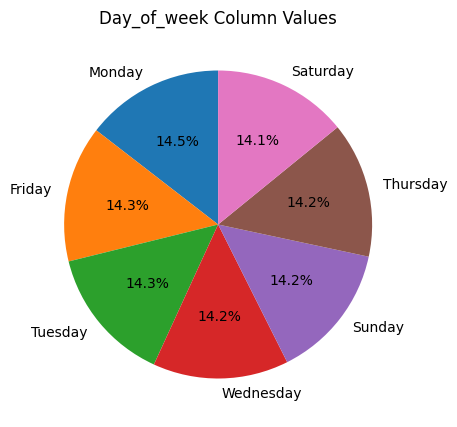

In [34]:
# Count distinct values
value_counts = df['Day_of_week'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Day_of_week Column Values')
plt.show()

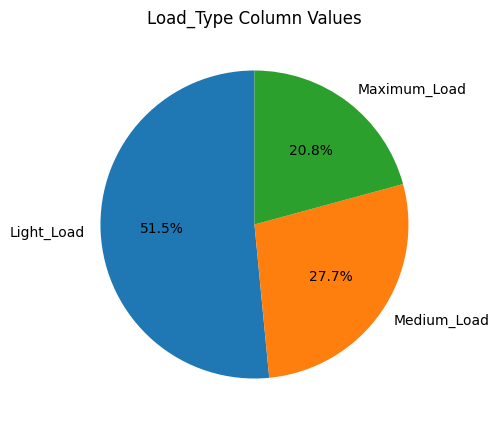

In [35]:
# Count distinct values
value_counts = df['Load_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Load_Type Column Values')
plt.show()

Now it's time to check the numeric columns, considering their descriptive statistics, density distribution and outlier occurrences.

In [36]:
# Checking the Descriptive Statistics of numerics columns
print(df.describe())

          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  31641.000000                          31514.000000   
mean    -131.002346                             13.041851   
std      478.871597                             16.307235   
min    -1571.800000                              0.000000   
25%        3.020000                              2.300000   
50%        4.000000                              5.000000   
75%       47.410000                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          31559.000000  31421.000000   
mean                               3.880215      0.011519   
std                                7.427221      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                    

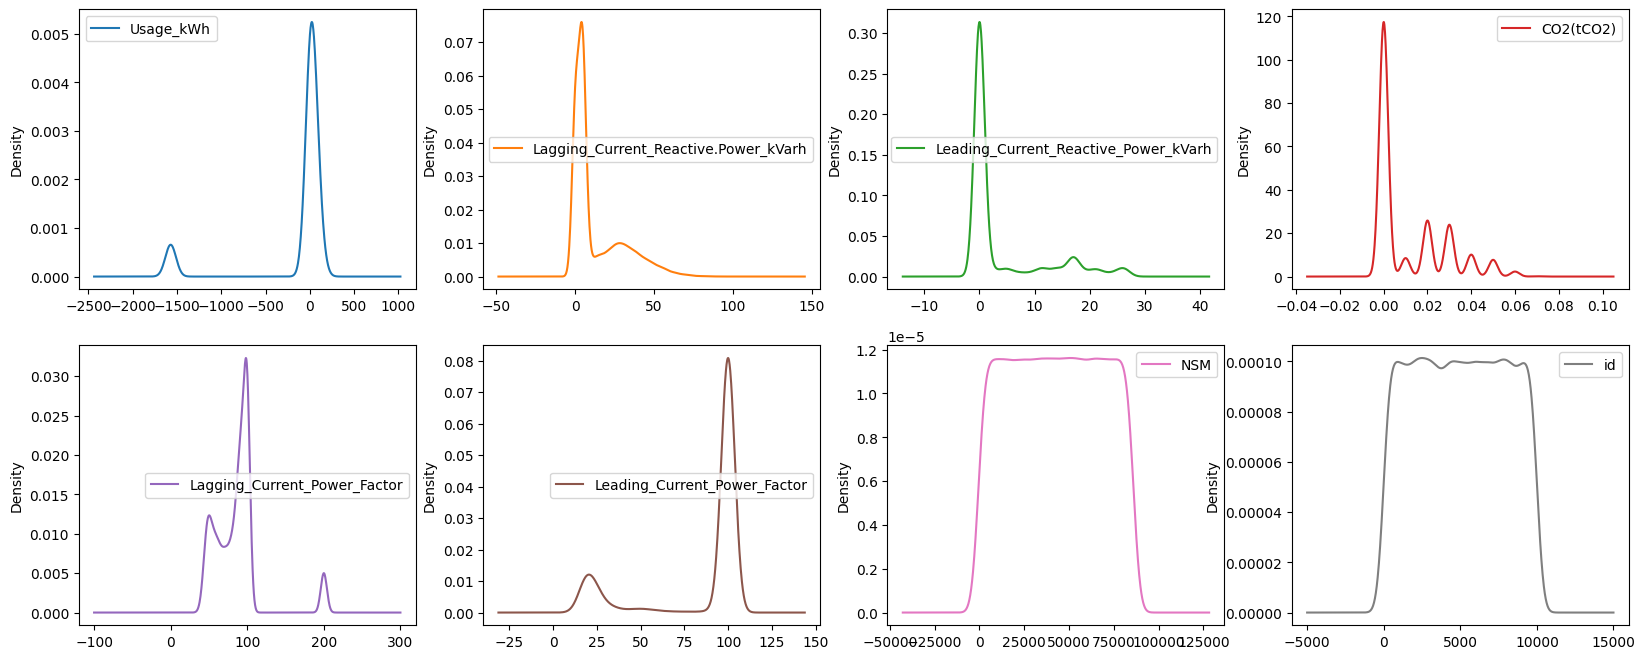

In [37]:
# Now let's check the density distribution of numeric columns
df.plot(kind = 'density', subplots = True, layout = (2,4), sharex = False, figsize = (20, 8))
plt.show()


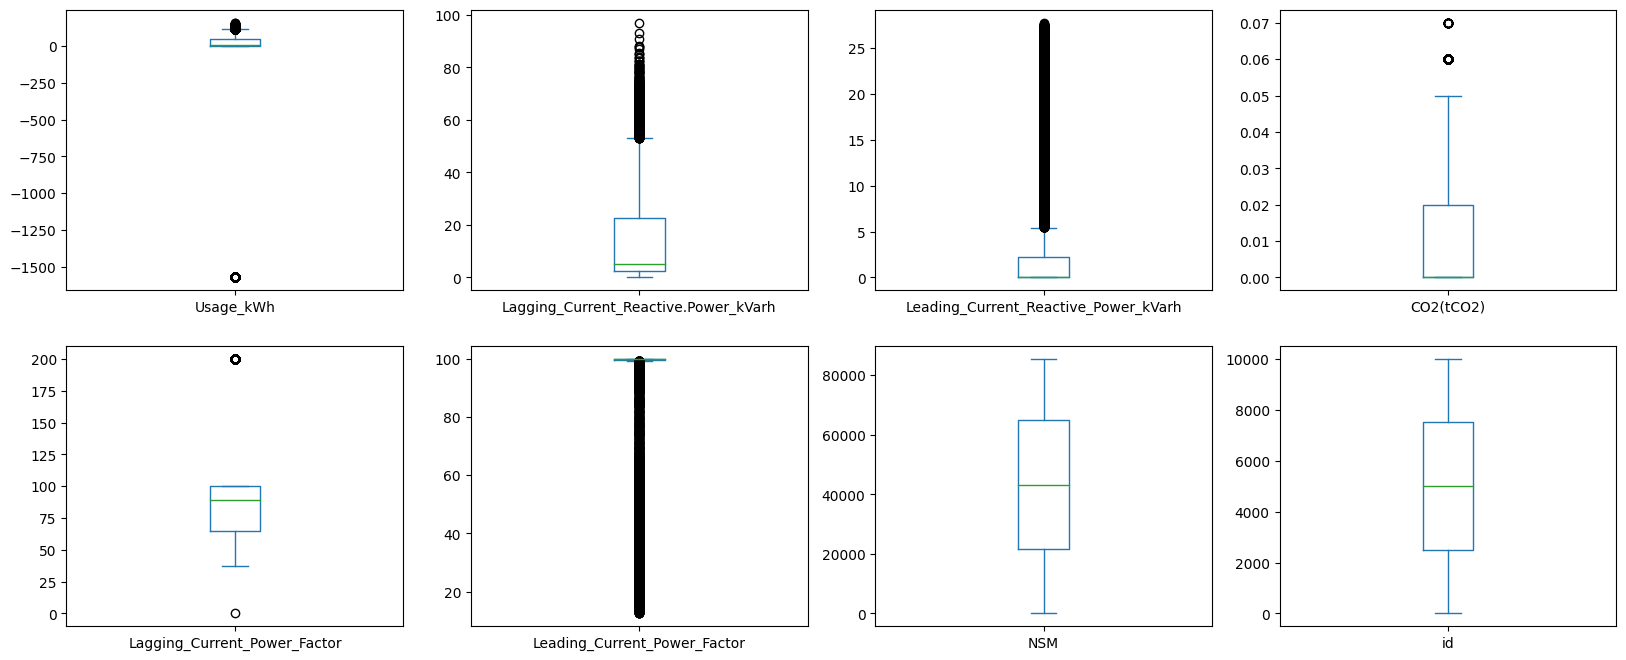

In [38]:
# Finally verifying if there is any outlier values based on IQR technique
df.plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (20,8))
plt.show()

We'd expect to see many outliers for some columns that have the following aspects
1. high standard deviation;
2. many missing values;
3. domain problems, such as negative consumption.

Once we have an overall understanding of the data, it's time to clean it up.

## Data Cleansing up
This chapter is to preprocess the data before applying any machine learning algorithm. Therefore, we will detect outlier and null values to replace those for estimated value.

### Replace Outlier Values

The outlier values increase the noise in the data. It's difficult task finding out what it'd be the correct signal value. On many times this task is impossible to discovery.

From categorical variables, only the date column there are outliers. As you saw, the most common values is 15 minutes differences between two rows. To be sure on time cadence, all column values will be replaced by estimated value considering the time series index multiplied by 15 minutes. The main reason is because we found duplicate values after some NaN rows.

In [39]:
# Change the format from object to datetime
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M", errors='coerce')
first_date = df['date'].min()
df['index'] = df.index
df.loc[:, 'date'] = df['index'].apply(lambda x: first_date + pd.Timedelta(minutes=15 * x))
df['cadence'] = df['date'] - df['date'].shift()
print(f" Min date: {df['date'].min()},\n Max date: {df['date'].max()},\n Min Cadence: {df['cadence'].min()},\n Max Cadence: {df['cadence'].max()}")
df.drop(columns=['index', 'cadence'], axis=1, inplace=True)

 Min date: 2018-01-01 00:00:00,
 Max date: 2018-12-31 23:45:00,
 Min Cadence: 0 days 00:15:00,
 Max Cadence: 0 days 00:15:00


Based on dataset documentation, we can assume that all numeric columns should be greater or equal to zero. In this solution version, we'll apply the following heuristic:

1.   Filtering (negative values) Or (outliers values based on IQR Range)
2.   Replace this noise for NaN (null) value
3.   Apply a weighted average to estimate the new value

This section is about the items 1 e 2. The next section is for item 3.

According the official dataset documentation, the id column there are random values and, as you saw, there isn't any missing value. So we'll apply data cleansing process only for others numeric columns, just the float64 ones, except the NSM column.

In [40]:
# Float64 column indexes are from 1 up to 6
list_indices = range(1,7)
print("Removing domain noise and outlier values on float64 columns: ")
for i in list_indices:
    print(f"\t({i}/6) Starting with {df.columns[i]}")
    # Negative value mask
    negative_value = df.iloc[:, i] < 0

    # IQR Range mask
    q3 = df.iloc[:, i].quantile(0.75)
    q1 = df.iloc[:, i].quantile(0.25)
    iqr = q3 - q1
    iqr_sup_lim = df.iloc[:, i] > (q3 + iqr) # value close to q3
    iqr_inf_lim = df.iloc[:, i] < (q1 - iqr) # value close to q1

    # Main mask
    mask = negative_value | iqr_sup_lim | iqr_inf_lim
    df.iloc[mask, i] = np.nan # replace by Not a Number value

Removing domain noise and outlier values on float64 columns: 
	(1/6) Starting with Usage_kWh
	(2/6) Starting with Lagging_Current_Reactive.Power_kVarh
	(3/6) Starting with Leading_Current_Reactive_Power_kVarh
	(4/6) Starting with CO2(tCO2)
	(5/6) Starting with Lagging_Current_Power_Factor
	(6/6) Starting with Leading_Current_Power_Factor


According to the Data Exploration section, specifically with regard to the bar chart in the Date column, the cadence between the lines is 15 minutes. Therefore, we are considering negative values or when these values are different from 15 * 60 seconds as outliers.

In [41]:
print("Removed domain noise and outlier values on NSM column.")
# Replacing outliers in NSM columns
negative_value = df['NSM'] < 0
previous_delta = (df['NSM'] - df['NSM'].shift()) != 15*60
next_delta = (df['NSM'].shift(-1) - df['NSM']) != 15*60

# Applying the mask
mask = negative_value | previous_delta | next_delta
df.loc[mask, 'NSM'] = np.nan # replace by Not a Number value

Removed domain noise and outlier values on NSM column.


Both the WeekStatus and Day_of_week category columns can be calculated from the clean date column. We will therefore remove the outliers and fill in the missing values in the next section.

### Replace Missing Values

This section is about replace missing values from the raw data and also replace NaN values from outlier detection heuristic. The goal is all columns have 35040 non-null values, except the target one (which will be fill by KNN algorithm).

Total of rows 35040


<Axes: >

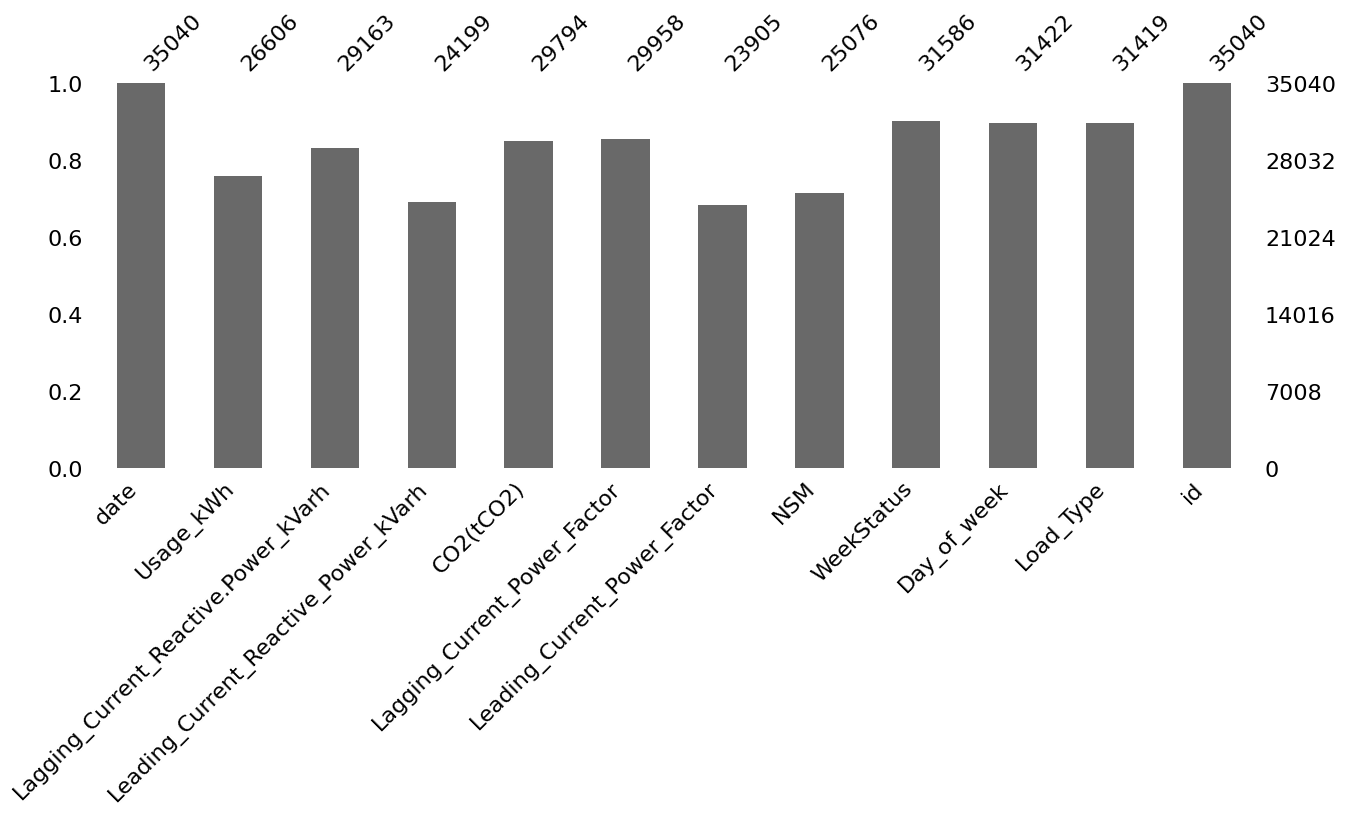

In [42]:
# Visualizing how many missing values there are
print(f"Total of rows {df.shape[0]}")
ms.bar(df, figsize=(15,5))

As you can see above, the total number of rows is 35040 (index) and the only column that is completely filled is the id column. Therefore we need to apply some techniques to replace missing values.

Before filling in the missing values column by column, let's check if there are any duplicate rows

In [43]:
# Looking for duplicate rows
grouped_df = df.groupby(list(df.columns)).size().reset_index(name='count_occurrences')
print(f"The maximum number of occurrences of row: {grouped_df.count_occurrences.max()}")
grouped_df = None

The maximum number of occurrences of row: 1


#### Date Column

Now it's time to analyze column by column, starting with the date. We can easily see that the cadence of the date column is 15 minutes. So, to fill in the missing values, we will check the value of the previous column and the next column to decide on the new value

In [44]:
# Fill missing values based on the previous filled value
while df['date'].isnull().any():
    df['date'].fillna(df['date'].shift() + pd.Timedelta(minutes=15), inplace=True)

# Check how many missing values there are in the column date
print(f"Total missing values: {df[df.date.isna()].shape[0]}")

Total missing values: 0


#### Numeric Columns

As mentioned at the beginning of this chapter, there are no missing values in the id column (int64). With the exception of the NSM column, for the other float64 columns, we must fill in the missing values using the following strategy:

In this version, we have opted for these steps as a solution:

1.   Remove Missing Values of the next steps
2.   Take the median value of the same day
3.   Take the median value of the same hour over the days
4.   Calculate the weighted average of the previous values and use it to fill in the missing values. We decided for: (2 x day mean + 8 x hour mean)/10

The decision to use the median is due to the fact that its value is robust in relation to outliers and, finally, we are using the mean to obtain a central value between the two.

Finally, with regard to the NSM column, we can calculate the values based on the date column, according to the documentation we just need to calculate the minutes from the start of the day.

In [45]:
# Feature engineering: create some columns to support the strategy above
df['only_date'] = df.date.dt.date
df['hour'] = df.date.dt.hour

# Replace Missing Values Strategy
df['day_median'] = 0
df['hour_median'] = 0

# Float64 column indexes are from 1 up to 6
list_indices = range(1,7)
print("Replacing missing values:")
for i in list_indices:
  print(f"\t({i}/6) Starting with {df.columns[i]}")

  # Step 1: Remove Missing Values of the next steps
  not_null = df.iloc[:, i].notna()

  for date in df.only_date.unique():
    # Step 2: Take the mean value of the same day
    same_day = df.only_date == date
    # Getting the mean value of the day
    mask = (not_null) & (same_day)
    pd_series = df[mask].iloc[:, i]
    # Mask for Missing Values
    missing_values = df.iloc[:, i].isna()
    mask = (missing_values) & (same_day)
    df.loc[mask, 'day_median'] =  pd_series.median()

  # Step 3: Take the mean value of the same hour over the days
  for hour in df.hour.unique():
    same_hour = df.hour == hour
    # Getting the mean value of the day
    mask = (not_null) & (same_hour)
    hour_median = df[mask].iloc[:, i].median()
    # Creating a mask based two criteria
    missing_values = df.iloc[:, i].isna()
    same_hour = df.hour == hour
    mask = (missing_values) & (same_hour)
    df.loc[mask, 'hour_median'] = hour_median

  # Step 4: Calculate the weighted average of the previous values and use it to fill in the missing values
  mask = df.iloc[:, i].isna()
  df.iloc[mask, i] = ( 2 * df.loc[mask, 'day_median'] + 8 * df.loc[mask, 'hour_median']) / 10

# Drop additional columns
df.drop(columns=['only_date', 'hour', 'day_median', 'hour_median'], axis=1, inplace=True)

Replacing missing values:
	(1/6) Starting with Usage_kWh
	(2/6) Starting with Lagging_Current_Reactive.Power_kVarh
	(3/6) Starting with Leading_Current_Reactive_Power_kVarh
	(4/6) Starting with CO2(tCO2)
	(5/6) Starting with Lagging_Current_Power_Factor
	(6/6) Starting with Leading_Current_Power_Factor


As the NSM column can be calculated from the clear date column, we decided to fill in all the values in the column according to the official documentation (seconds difference from 00:00:00) and the date range (15 minutes).

In [46]:
# Calculate all values of NSM from cleaned date column
df['delta'] =  (df['date'] - pd.to_datetime(df['date'].dt.date))
df['NSM'] = df['delta'].dt.total_seconds()

# Double-checking the column output
print(f"Max NSM (last datapoint): {df['NSM'].max()}, Min NSM (first datapoint): {df['NSM'].min()}")
df['only_date'] = df['date'].dt.date
df_check = df.groupby('only_date')['NSM'].transform(lambda x: x - x.shift())
print(f"Max Delta on the same day: {df_check.max()}, Min Delta on the same day: {df_check.min()}")
df.drop(columns=['delta', 'only_date'], axis=1, inplace=True)
df_check = None

Max NSM (last datapoint): 85500.0, Min NSM (first datapoint): 0.0
Max Delta on the same day: 900.0, Min Delta on the same day: 900.0


#### Derived Columns by Date Column

The columns day_of_week and WeekStatus are calculated based on date column. Therefore, for the missing values, we can easily calculate the value using the pandas function. To be sure that there isn't any outliers values, we will recalculate all values for those columns.

In [47]:
print(f"Before: unique values from weekstatus column: {df.WeekStatus.unique()}")
df['WeekStatus'] = df['date'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
print(f"After: unique values from weekstatus column: {df.WeekStatus.unique()}")

Before: unique values from weekstatus column: ['Weekday' nan 'Weekend']
After: unique values from weekstatus column: ['Weekday' 'Weekend']


In [48]:
print(f"Before: unique values from Day_of_week column: {len(df.Day_of_week.unique())}")
df['Day_of_week'] = df['date'].dt.day_name()
print(f"After: unique values from Day_of_week column: {len(df.Day_of_week.unique())}")

Before: unique values from Day_of_week column: 8
After: unique values from Day_of_week column: 7


### Double-checking on cleaned dataframe

Finally, let's check if there is any missing value using the same visualization as the beginning of this session. As you can see, all columns there are 35040 non-null values, except the target-attribute (Load_Type) that we will use the KNN to fill.

<Axes: >

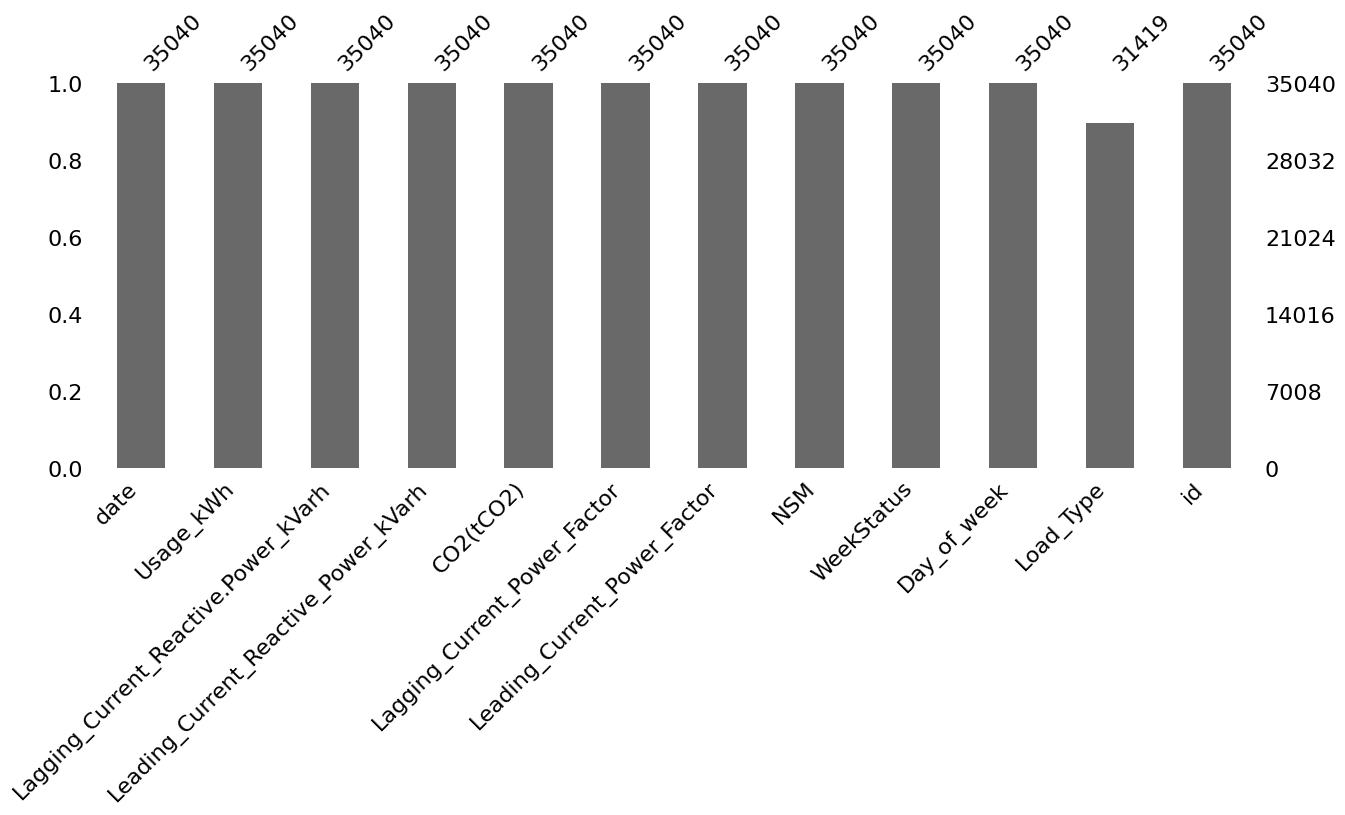

In [49]:
ms.bar(df, figsize=(15,5))

For double-checking reason, We will replot two charts (density distribution and bar one) to review the output of Data Cleasing phase.

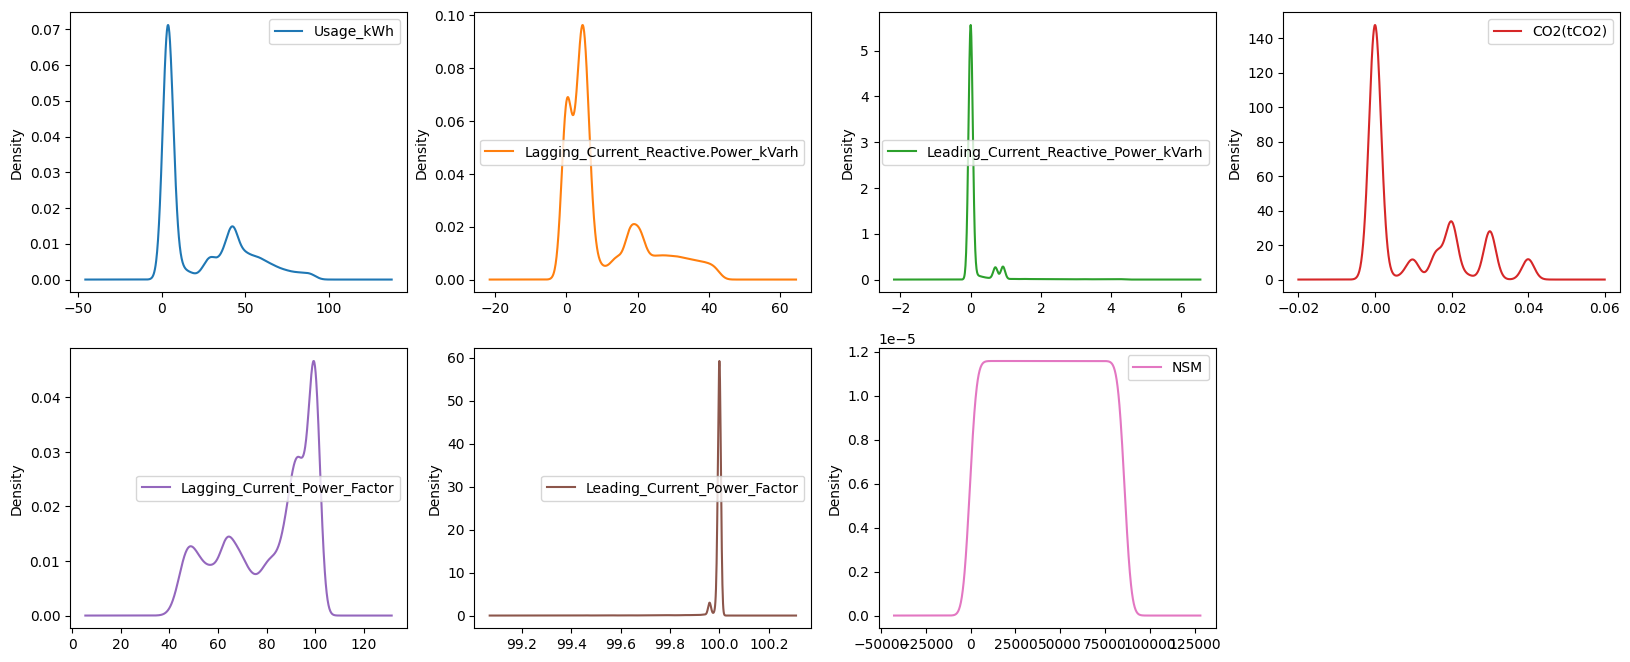

In [50]:
# Now let's check the density distribution of numeric columns
df.iloc[:, 1:8].plot(kind = 'density', subplots = True, layout = (2,4), sharex = False, figsize = (20, 8))
plt.show()

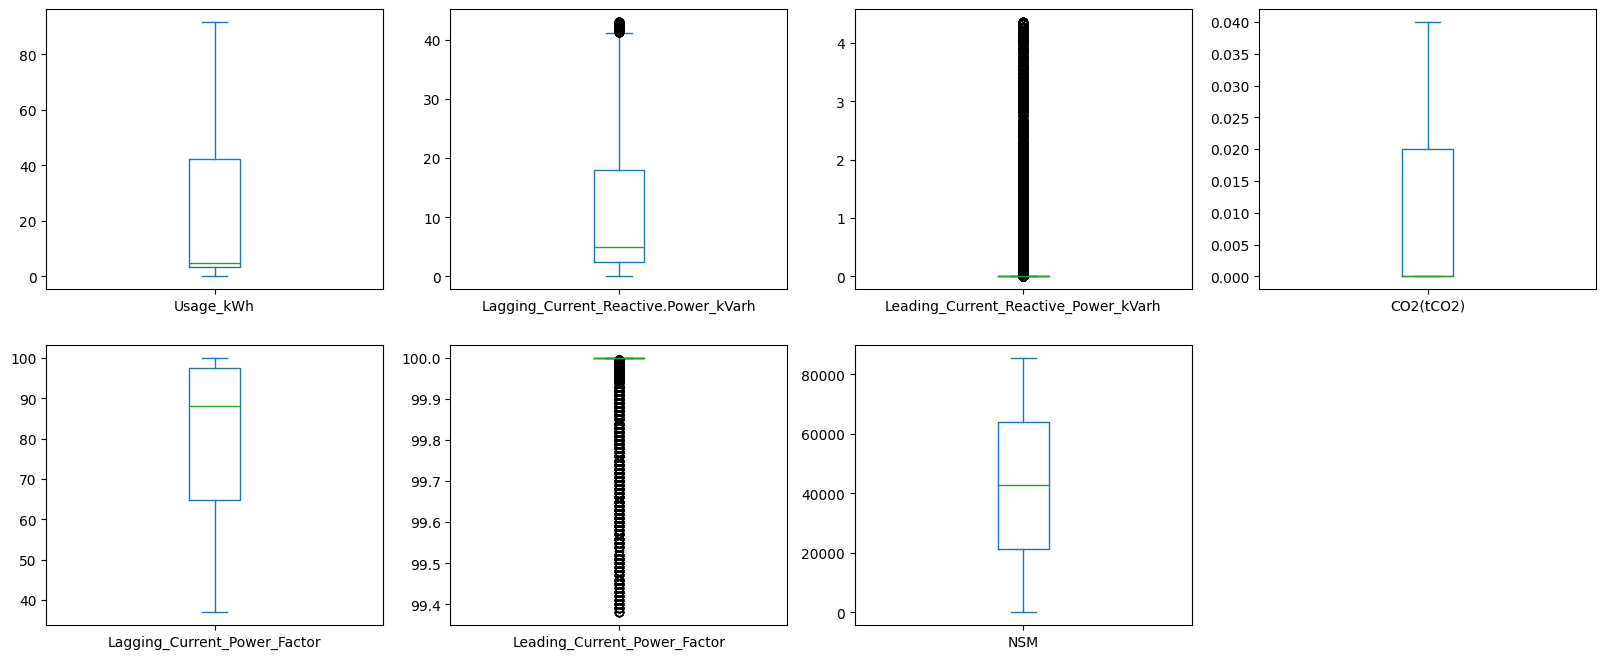

In [51]:
# Finally verifying if there is any outlier values based on IQR technique
df.iloc[:, 1:8].plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (20,8))
plt.show()

df_cleaned = df
df = None

As you can see above, the NSM column which didn't have outliers before, it is still without outliers. After cleansing up phase, the columns Usage_kWh, CO2(tCO2) and Lagging_Current_Power_factor are without outliers. These 3 columns which have outliers, all of those decreased significantly the y range. Discussing specially of Leading_Current_Power_Factor column, its range decrease from 0-100 to 99.4-100. Additionally, those 3 columns keep their propreties about first and third quantile.

Finally, it's important highlight that the boxplot chart is based on IQR Method to identify outliers automatically and the default value is based on 1.5 * IQR. Of course, each situation needs a business domain professional to validate if the automatically outlier detection by IQR is correct (or not). For instance to demonstrate the technique, we assume the previous steps as enough to clean up task when there isn't any business specialist on the team.

## Column Target Classification by KNN

This section regards Load_Type classification by the KNN algorithm. Before applying the algorithm, we will check the following items:
1.   Normalize the float64 columns and transform category variables into numeric ones
2.   Check the correlaction between variables
3.   Decide for the features to fill the KNN

These previous steps are important to do some data transformation to increase the algorithm eficience.



In [52]:
# Step 1: Normalized Numeric Column
df_normalized = df_cleaned
scaler = MinMaxScaler()
for i in range(1,8):
  df_normalized.iloc[:, i] = scaler.fit_transform(df_normalized.iloc[:, [i]])

# Step 1: Transform category values into numeric
list_names = ['date', 'WeekStatus',	'Day_of_week']

for col in list_names:
  ordinal_encoder = OrdinalEncoder(categories=[df_normalized[col].unique()])
  df_normalized[col] = ordinal_encoder.fit_transform(df_normalized[[col]])


<Axes: >

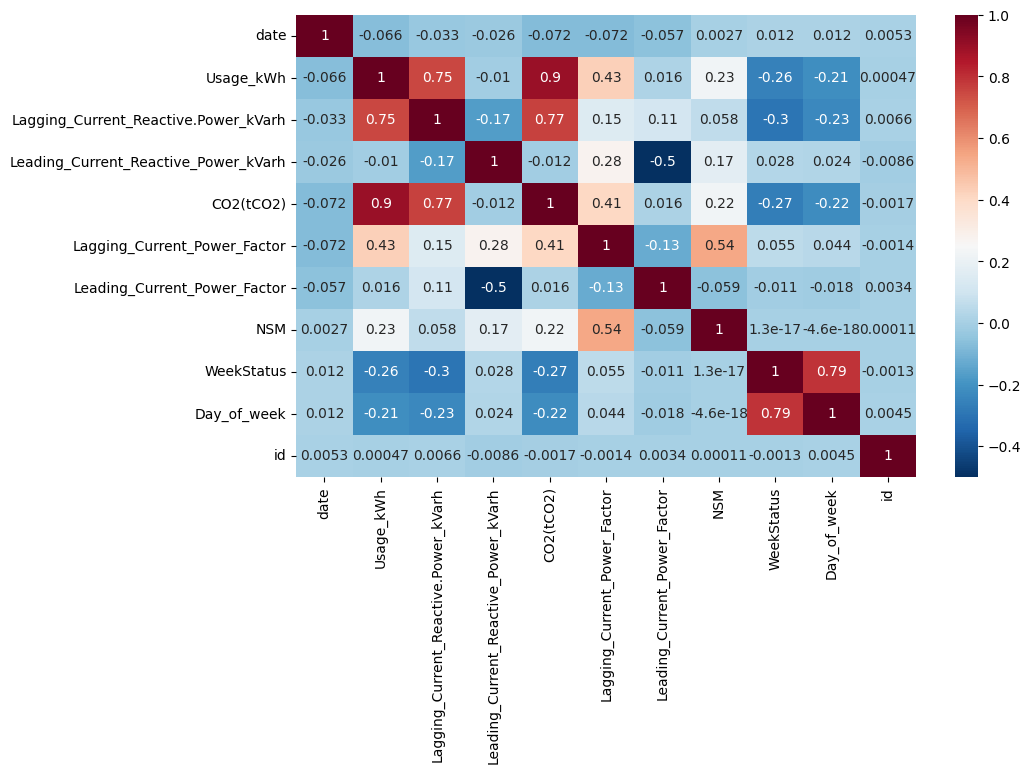

In [53]:
# Step 2: Column correlaction
features=['date', 'Usage_kWh',	'Lagging_Current_Reactive.Power_kVarh',	'Leading_Current_Reactive_Power_kVarh',	'CO2(tCO2)',	'Lagging_Current_Power_Factor',	'Leading_Current_Power_Factor',	'NSM',	'WeekStatus',	'Day_of_week', 'id']
plt.figure(figsize=(10, 6))
sns.heatmap(df_normalized.loc[:, features].corr(), annot=True, cmap='RdBu_r')

As the "date" and "id" columns there isn't any duplicate value, these columns were removed of KNN set features.

After analyzing the correlaction heatmap chart, we decided to removed some columns which are strong correlacted (>75%) with others. Let's check the removed columns:


1.   CO2(tCO2): It's strongly correlacted with Usage_kWh
2.   Lagging_Current_Reactive.Power_kVarh: It's strongly correlacted with Usage_kWh
3. WeekStatus: It's strongly correlacted with Day_of_week

In [54]:
# Also applying the ordinal enconder over the target column
mask = df_normalized['Load_Type'].notna()
categories = [df_normalized.loc[mask, 'Load_Type'].unique()]
ordinal_encoder = OrdinalEncoder(categories=categories)
df_normalized.loc[mask, 'Load_Type'] = ordinal_encoder.fit_transform(df_normalized.loc[mask, 'Load_Type'].values.reshape(-1, 1))

# Get the selected features from known target column value
features = ['Usage_kWh', 'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',	'Leading_Current_Power_Factor',	'NSM', 'Day_of_week']
X = df_normalized.loc[mask, features]
# Get the knwon target value
y = df_normalized.loc[mask, ['Load_Type']]